In [1]:
# First we load the data

In [2]:
# Imports

# Numpy,Pandas
import numpy as np
import pandas as pd

# matplotlib,seaborn,pyecharts

import matplotlib.pyplot as plt
plt.style.use('ggplot')  #ggplot 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import missingno as msno
from sklearn.impute import SimpleImputer


#  skip the warnings
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
data = pd.read_csv('adult.csv' , encoding='latin-1',skiprows = 0) #read data
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Second we do data preprocessing 

In [5]:
data.replace('?', np.nan, inplace=True) #became null

In [6]:
data.isnull().values.any()

True

In [7]:
data.isna()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
check_null = data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data)) #check the null in our data
print(check_null[check_null > 0]) 

occupation       0.05660
workclass        0.05639
native.country   0.01790
dtype: float64


In [9]:
data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data)) 

occupation       0.05660
workclass        0.05639
native.country   0.01790
income           0.00000
hours.per.week   0.00000
capital.loss     0.00000
capital.gain     0.00000
sex              0.00000
race             0.00000
relationship     0.00000
marital.status   0.00000
education.num    0.00000
education        0.00000
fnlwgt           0.00000
age              0.00000
dtype: float64

In [10]:
data.to_csv('prosaved.csv', index = False) # after prepocessing we make it as a new csv file

In [11]:
df = pd.read_csv('prosaved.csv',encoding='gb18030') 
df.dtypes.value_counts() # check the data type agian 

object    9
int64     6
dtype: int64

In [12]:
df.shape

(32561, 15)

In [13]:
objectColumns = df.select_dtypes(include=["object"]).columns
df[objectColumns].isnull().sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native.country     583
income               0
sex                  0
race                 0
relationship         0
marital.status       0
education            0
dtype: int64

In [14]:
objectColumns = df.select_dtypes(include=["object"]).columns  # give the new varible name for the objectColumns

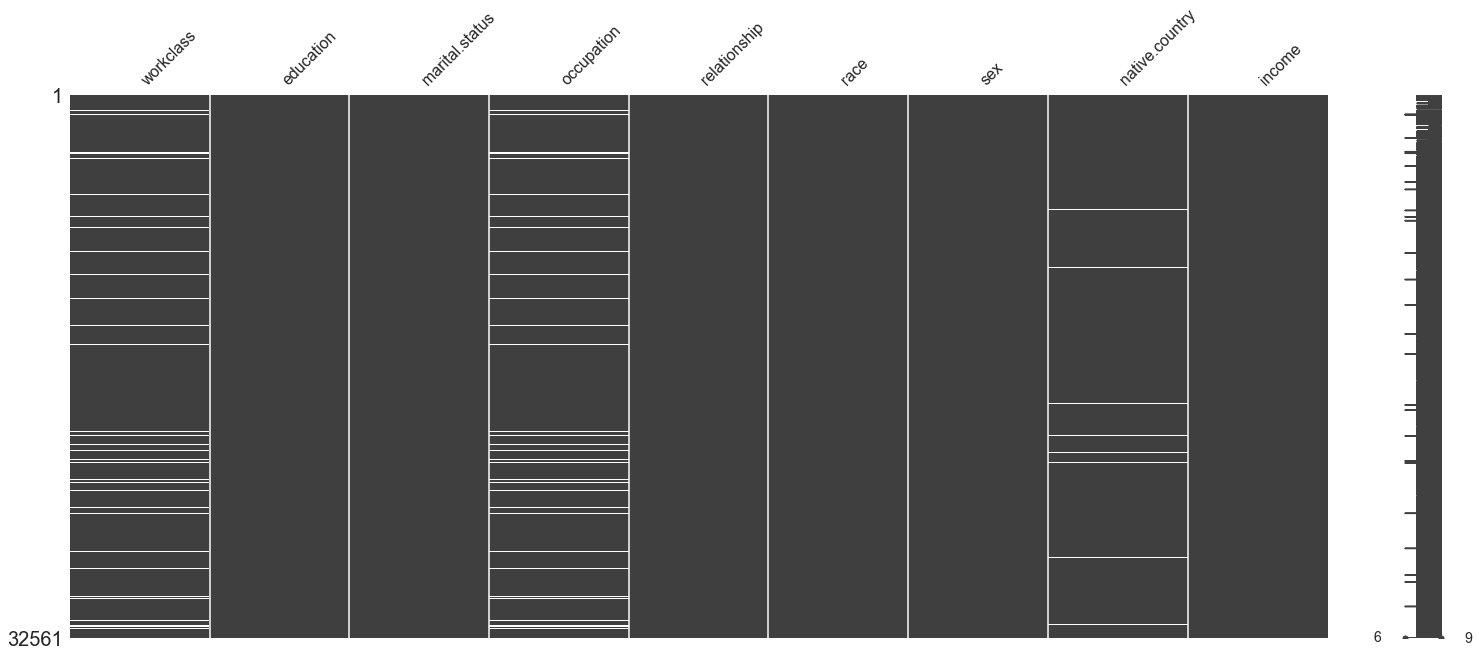

In [15]:
msno.matrix(df[objectColumns]) #see the null in the data 

In [16]:
# we use the most frequency one to fill up our null. 

In [17]:
from collections import Counter
Counter(df['workclass'])

Counter({nan: 1836,
         'Private': 22696,
         'State-gov': 1298,
         'Federal-gov': 960,
         'Self-emp-not-inc': 2541,
         'Self-emp-inc': 1116,
         'Local-gov': 2093,
         'Without-pay': 14,
         'Never-worked': 7})

In [18]:
df['workclass'] = df['workclass'].fillna('Private') # fill the number 

In [19]:
from collections import Counter
Counter(df['occupation'])

Counter({nan: 1843,
         'Exec-managerial': 4066,
         'Machine-op-inspct': 2002,
         'Prof-specialty': 4140,
         'Other-service': 3295,
         'Adm-clerical': 3770,
         'Craft-repair': 4099,
         'Transport-moving': 1597,
         'Handlers-cleaners': 1370,
         'Sales': 3650,
         'Farming-fishing': 994,
         'Tech-support': 928,
         'Protective-serv': 649,
         'Armed-Forces': 9,
         'Priv-house-serv': 149})

In [20]:
df['occupation'] = df['occupation'].fillna('Prof-specialty')

In [21]:
from collections import Counter
Counter(df['native.country'])

Counter({'United-States': 29170,
         nan: 583,
         'Mexico': 643,
         'Greece': 29,
         'Vietnam': 67,
         'China': 75,
         'Taiwan': 51,
         'India': 100,
         'Philippines': 198,
         'Trinadad&Tobago': 19,
         'Canada': 121,
         'South': 80,
         'Holand-Netherlands': 1,
         'Puerto-Rico': 114,
         'Poland': 60,
         'Iran': 43,
         'England': 90,
         'Germany': 137,
         'Italy': 73,
         'Japan': 62,
         'Hong': 20,
         'Honduras': 13,
         'Cuba': 95,
         'Ireland': 24,
         'Cambodia': 19,
         'Peru': 31,
         'Nicaragua': 34,
         'Dominican-Republic': 70,
         'Haiti': 44,
         'El-Salvador': 106,
         'Hungary': 13,
         'Columbia': 59,
         'Guatemala': 64,
         'Jamaica': 81,
         'Ecuador': 28,
         'France': 29,
         'Yugoslavia': 16,
         'Scotland': 12,
         'Portugal': 37,
         'Laos': 18,
         

In [22]:
df['native.country'] = df['native.country'].fillna('United-States')

In [23]:
objectColumns = df.select_dtypes(include=["object"]).columns  # use the new varible name agian 

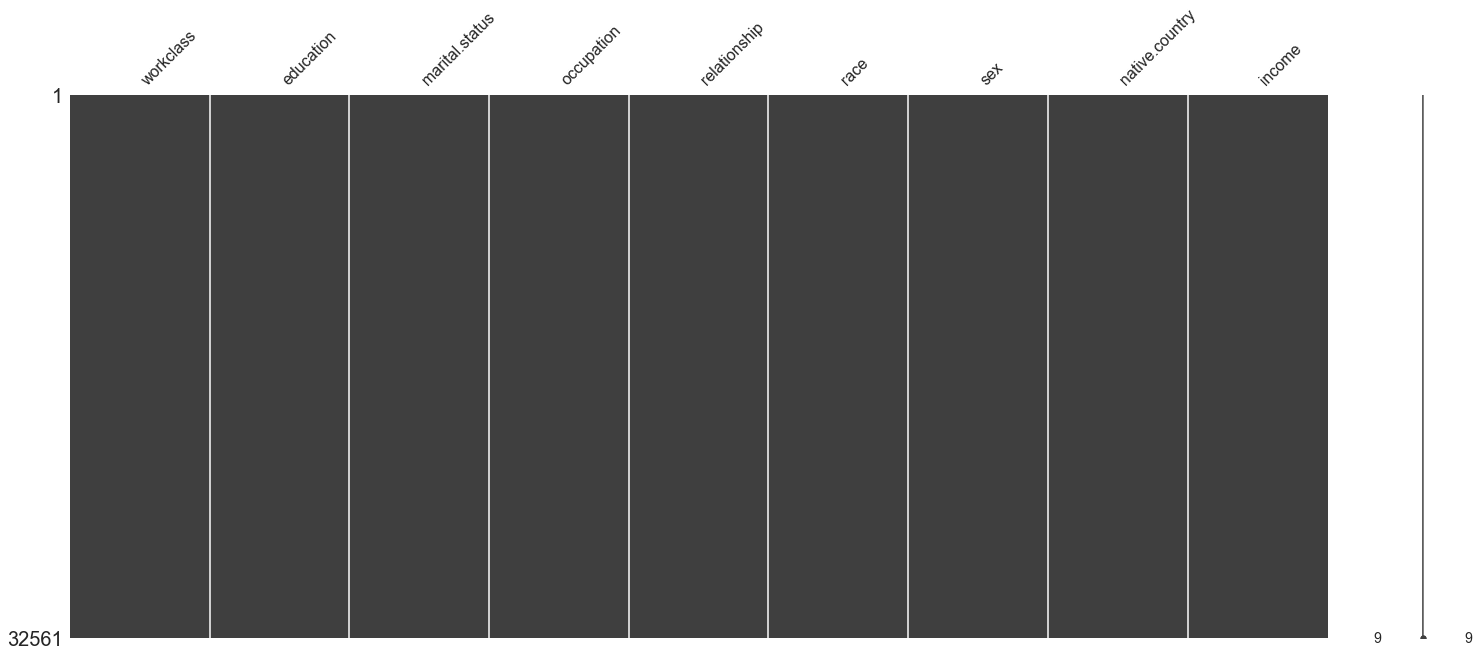

In [24]:
msno.matrix(df[objectColumns]) #check the whol null number after doing work 

In [25]:
df.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)

hours.per.week    0
capital.loss      0
capital.gain      0
education.num     0
fnlwgt            0
age               0
dtype: int64

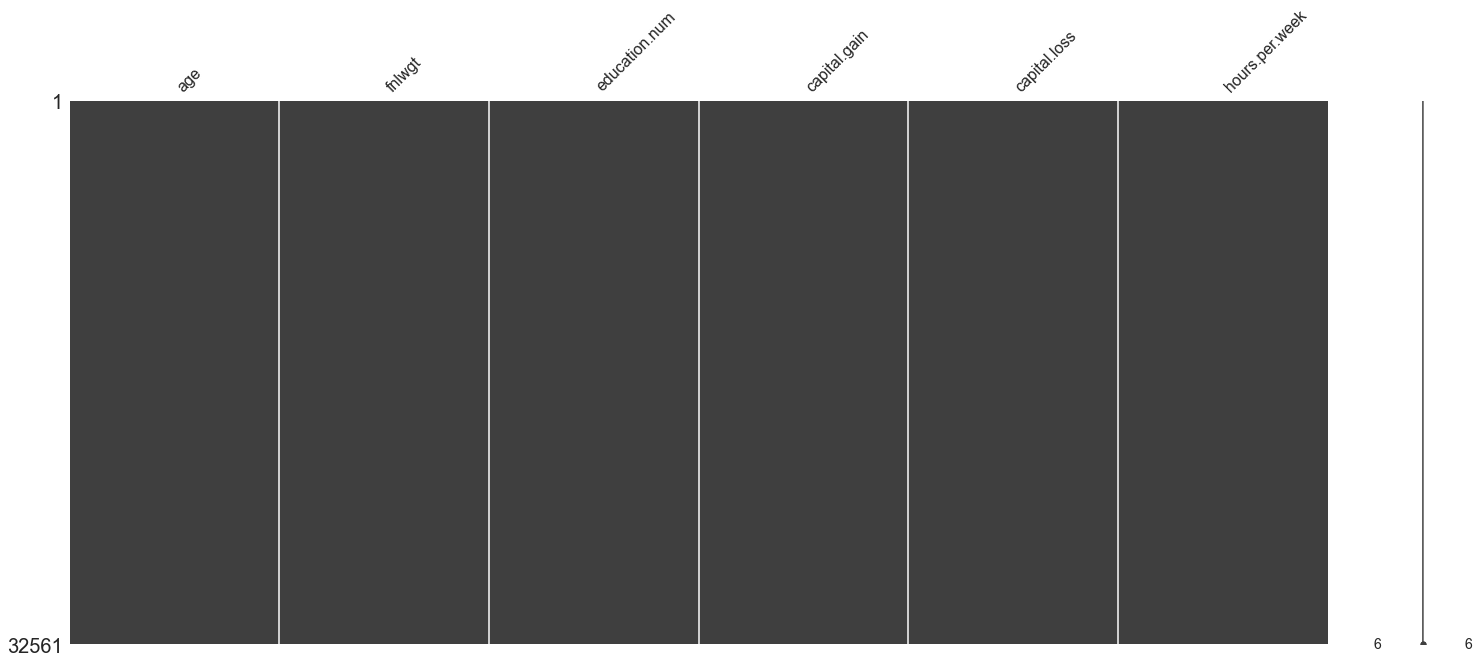

In [26]:
numColumns = df.select_dtypes(include=[np.number]).columns
msno.matrix(df[numColumns]) 

In [27]:
# we can see the data is full now 

In [28]:
df.head() # check again 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [29]:
df.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data))    #make sure all data are not null. 

income           0.00000
native.country   0.00000
hours.per.week   0.00000
capital.loss     0.00000
capital.gain     0.00000
sex              0.00000
race             0.00000
relationship     0.00000
occupation       0.00000
marital.status   0.00000
education.num    0.00000
education        0.00000
fnlwgt           0.00000
workclass        0.00000
age              0.00000
dtype: float64

In [30]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})#swicth it to 0 an 1

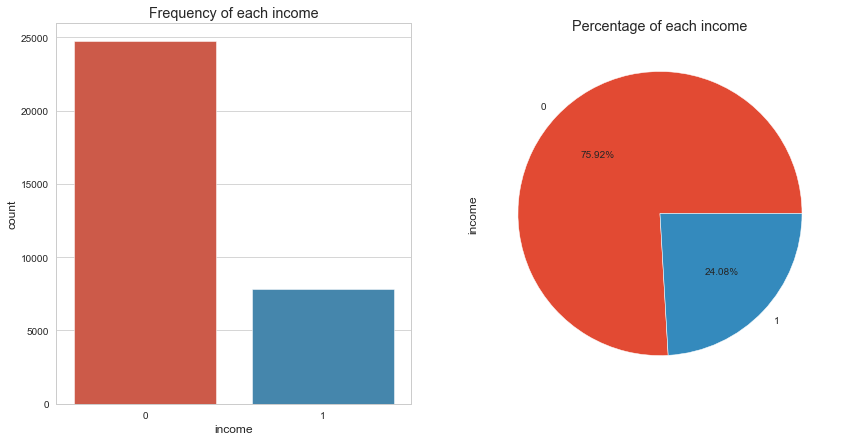

In [31]:
#make the t/f as the graph, whcih can help  us to see more clear.  
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='income',data=df,ax=axs[0])
axs[0].set_title("Frequency of each income")
df['income'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each income")
plt.show()

In [32]:
object_columns_df =df.select_dtypes(include=["object"]) #find the object varible in our data 
print(object_columns_df.iloc[0])

workclass                Private
education                HS-grad
marital.status           Widowed
occupation        Prof-specialty
relationship       Not-in-family
race                       White
sex                       Female
native.country     United-States
Name: 0, dtype: object


In [33]:
mapping_dict = {
    "sex": {
     "Male":1,
        "Female":0
    }
}

df = df.replace(mapping_dict) #switch to the new map 
df[['sex']] #check 

,sex
0,0
1,0
2,0
3,0
4,0
...,...
32556,1
32557,0
32558,1
32559,0


In [34]:
data=df.copy()

In [35]:
# Third, then we do the feature engineering 

In [36]:
#we choose to process the non-number feature first. (object feture)

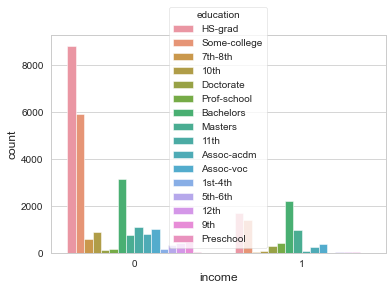

In [37]:
sns.countplot(x = 'income', hue = 'education', data = data)

In [38]:
data.drop(['education.num'], axis = 1, inplace = True)
data['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],'beforeschool', inplace = True)

In [39]:
from collections import Counter
Counter(data['education']) 

Counter({'HS-grad': 10501,
         'Some-college': 7291,
         'beforeschool': 4253,
         'Doctorate': 413,
         'Prof-school': 576,
         'Bachelors': 5355,
         'Masters': 1723,
         'Assoc-acdm': 1067,
         'Assoc-voc': 1382})

In [40]:
data['education'].replace(['HS-grad','Some-college'],'middle', inplace = True)

In [41]:
data['education'].replace(['Doctorate','Prof-school','Masters'],'high-edu', inplace = True)

In [42]:
data['education'].replace(['Assoc-acdm','Assoc-voc','Bachelors'],'normal', inplace = True)

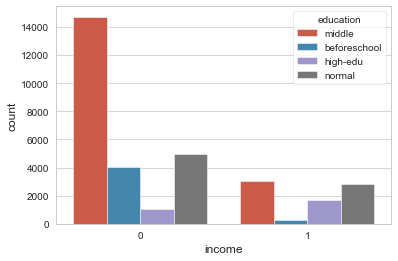

In [43]:
sns.countplot(x = 'income', hue = 'education', data = data)

In [44]:
#We can see it become more clear, and the people in the high, right is more than left, middle people has big gap, 
#people in the before has almost nobody in the right. 

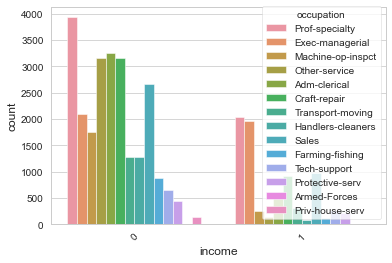

In [45]:
plt.xticks(rotation = 45)
sns.countplot(x = 'income', hue = 'occupation', data = data)

In [46]:
from collections import Counter
Counter(data['occupation']) 

Counter({'Prof-specialty': 5983,
         'Exec-managerial': 4066,
         'Machine-op-inspct': 2002,
         'Other-service': 3295,
         'Adm-clerical': 3770,
         'Craft-repair': 4099,
         'Transport-moving': 1597,
         'Handlers-cleaners': 1370,
         'Sales': 3650,
         'Farming-fishing': 994,
         'Tech-support': 928,
         'Protective-serv': 649,
         'Armed-Forces': 9,
         'Priv-house-serv': 149})

In [47]:
data['occupation'].replace(['Machine-op-inspct','Craft-repair','Tech-support'],'tech', inplace = True)

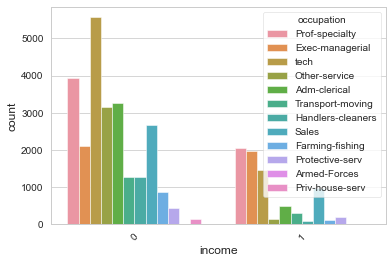

In [48]:
plt.xticks(rotation = 45)
sns.countplot(x = 'income', hue = 'occupation', data = data)

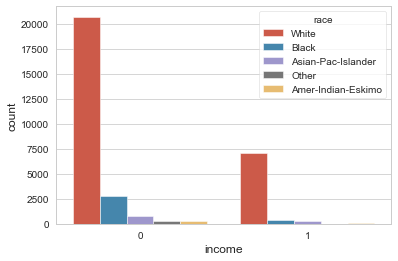

In [49]:
sns.countplot(x = 'income', hue = 'race', data = data)

In [50]:
#we do not change this one. 

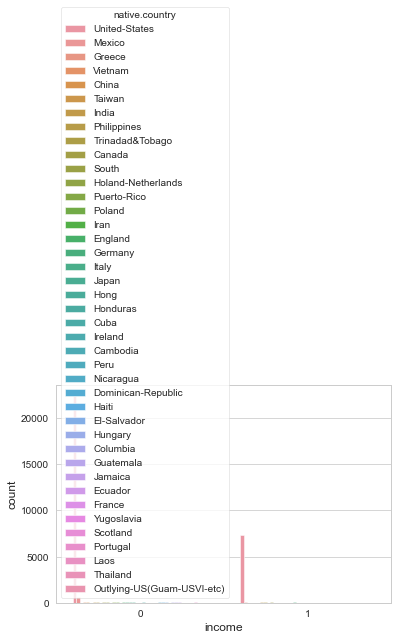

In [51]:
sns.countplot(x = 'income', hue = 'native.country', data = data)

In [52]:
countries = np.array(data['native.country'].unique())
countries = np.delete(countries, 0)

In [53]:
data['native.country'].replace(countries, 'Other_country', inplace = True)

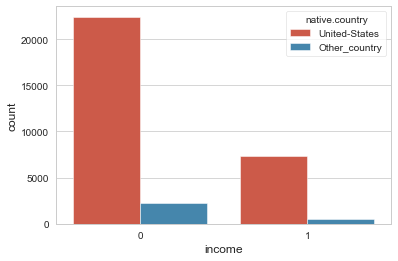

In [54]:
sns.countplot(x = 'income', hue = 'native.country', data = data)

In [55]:
#we separate as us and other-country

In [56]:
object_columns_df =data.select_dtypes(include=["object"]) 
print(object_columns_df.iloc[0])

workclass                Private
education                 middle
marital.status           Widowed
occupation        Prof-specialty
relationship       Not-in-family
race                       White
native.country     United-States
Name: 0, dtype: object


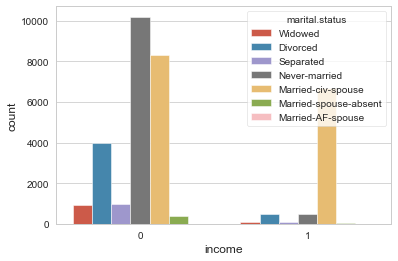

In [57]:
sns.countplot(x = 'income', hue = 'marital.status', data = data)

In [58]:
Counter(data['marital.status']) 

Counter({'Widowed': 993,
         'Divorced': 4443,
         'Separated': 1025,
         'Never-married': 10683,
         'Married-civ-spouse': 14976,
         'Married-spouse-absent': 418,
         'Married-AF-spouse': 23})

In [59]:
data['marital.status'].replace(['Widowed','Divorced','Separated'],'aftermarried', inplace = True)

In [60]:
data['marital.status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'inmarried', inplace = True)

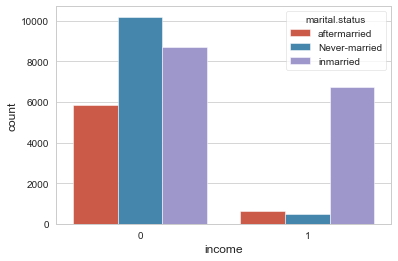

In [61]:
sns.countplot(x = 'income', hue = 'marital.status', data = data)

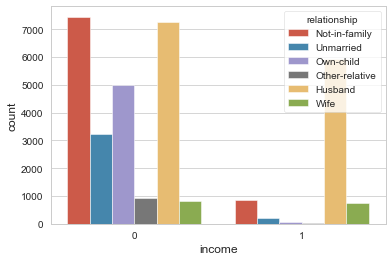

In [62]:
sns.countplot(x = 'income', hue = 'relationship', data = data)

In [63]:
Counter(data['relationship']) 

Counter({'Not-in-family': 8305,
         'Unmarried': 3446,
         'Own-child': 5068,
         'Other-relative': 981,
         'Husband': 13193,
         'Wife': 1568})

In [64]:
data['relationship'].replace(['Other-relative','Unmarried','Own-child'],'unstable', inplace = True)

In [65]:
data['relationship'].replace(['Husband','Wife'],'stable', inplace = True)

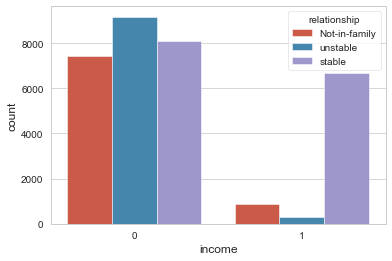

In [66]:
sns.countplot(x = 'income', hue = 'relationship', data = data)

In [67]:
#we divide it to three groups 

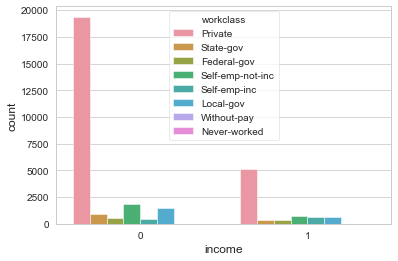

In [68]:
sns.countplot(x = 'income', hue = 'workclass', data = data)

In [69]:
Counter(data['workclass']) 

Counter({'Private': 24532,
         'State-gov': 1298,
         'Federal-gov': 960,
         'Self-emp-not-inc': 2541,
         'Self-emp-inc': 1116,
         'Local-gov': 2093,
         'Without-pay': 14,
         'Never-worked': 7})

In [70]:
data['workclass'].replace(['State-gov','Local-gov','Federal-gov'],'gov', inplace = True)

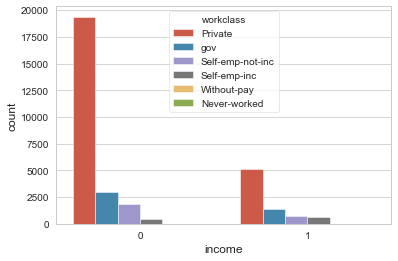

In [71]:
sns.countplot(x = 'income', hue = 'workclass', data = data)

In [72]:
#then we do the number varible, which means int, float....  

In [73]:
data.describe()

,age,fnlwgt,sex,capital.gain,capital.loss,hours.per.week,income
count,32561.00000,32561.00000,32561.00000,32561.00000,32561.00000,32561.00000,32561.00000
mean,38.58165,189778.36651,0.66921,1077.64884,87.30383,40.43746,0.24081
std,13.64043,105549.97770,0.47051,7385.29208,402.96022,12.34743,0.42758
min,17.00000,12285.00000,0.00000,0.00000,0.00000,1.00000,0.00000
25%,28.00000,117827.00000,0.00000,0.00000,0.00000,40.00000,0.00000
50%,37.00000,178356.00000,1.00000,0.00000,0.00000,40.00000,0.00000
75%,48.00000,237051.00000,1.00000,0.00000,0.00000,45.00000,0.00000
max,90.00000,1484705.00000,1.00000,99999.00000,4356.00000,99.00000,1.00000


In [74]:
#we can see whole number-type data 

In [75]:
#data['fnlwgt'] = pd.cut(data['fnlwgt'], bins = [0,80000,120000,150000,180000,10000000], labels = ['1', '2','3','4','5'])

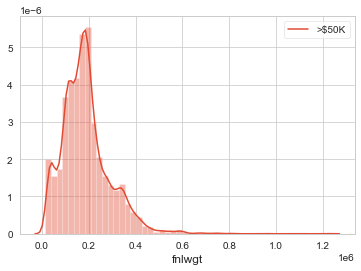

In [76]:
sns.distplot(data.loc[data['income'] == 1]['fnlwgt'], kde_kws={"label": ">$50K"});

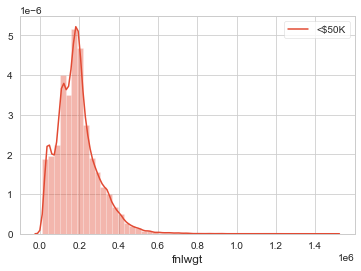

In [77]:
sns.distplot(data.loc[data['income'] == 0]['fnlwgt'], kde_kws={"label": "<$50K"});

In [78]:
# we can see there is no connection between the fnlwgt and output.  these two pic are almost samed istribution 

In [79]:
data.drop(['fnlwgt'], axis = 1, inplace = True)

In [80]:
data['Capital.remain'] = data['capital.gain'] - data['capital.loss']

In [81]:
#feture construction and check the gain, loss , do we need to delete them? 

In [82]:
data.describe()

,age,sex,capital.gain,capital.loss,hours.per.week,income,Capital.remain
count,32561.00000,32561.00000,32561.00000,32561.00000,32561.00000,32561.00000,32561.00000
mean,38.58165,0.66921,1077.64884,87.30383,40.43746,0.24081,990.34501
std,13.64043,0.47051,7385.29208,402.96022,12.34743,0.42758,7408.98695
min,17.00000,0.00000,0.00000,0.00000,1.00000,0.00000,-4356.00000
25%,28.00000,0.00000,0.00000,0.00000,40.00000,0.00000,0.00000
50%,37.00000,1.00000,0.00000,0.00000,40.00000,0.00000,0.00000
75%,48.00000,1.00000,0.00000,0.00000,45.00000,0.00000,0.00000
max,90.00000,1.00000,99999.00000,4356.00000,99.00000,1.00000,99999.00000


In [83]:
#next, we do the one-hot work

In [84]:
data.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Capital.remain
0,90,Private,middle,aftermarried,Prof-specialty,Not-in-family,White,0,0,4356,40,United-States,0,-4356
1,82,Private,middle,aftermarried,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0,-4356
2,66,Private,middle,aftermarried,Prof-specialty,unstable,Black,0,0,4356,40,United-States,0,-4356
3,54,Private,beforeschool,aftermarried,tech,unstable,White,0,0,3900,40,United-States,0,-3900
4,41,Private,middle,aftermarried,Prof-specialty,unstable,White,0,0,3900,40,United-States,0,-3900


ValueError: zero-size array to reduction operation fmin which has no identity

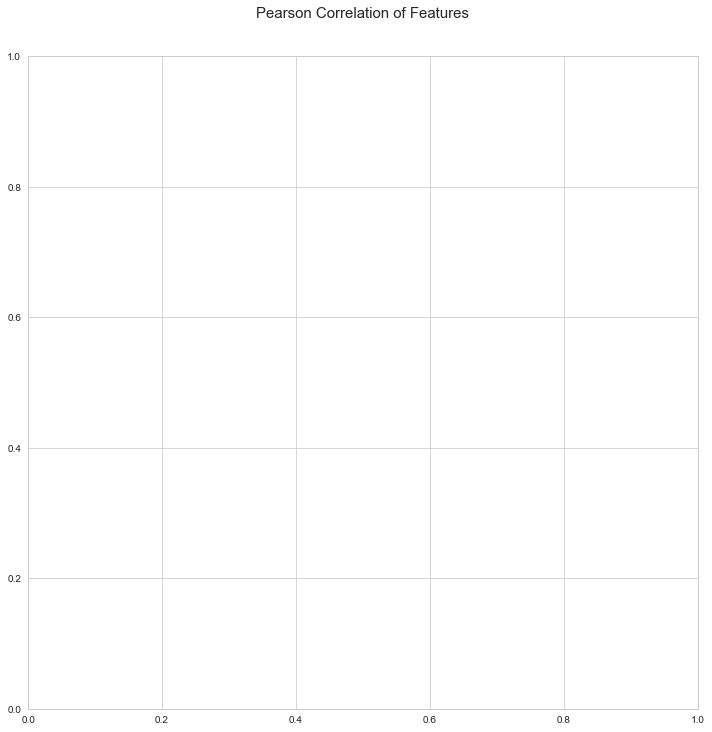

In [85]:
col = data.select_dtypes(include=['int64','float64']).columns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data[col].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [86]:
data.drop(['capital.gain'], axis = 1, inplace = True)

In [87]:
data.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income,Capital.remain
0,90,Private,middle,aftermarried,Prof-specialty,Not-in-family,White,0,4356,40,United-States,0,-4356
1,82,Private,middle,aftermarried,Exec-managerial,Not-in-family,White,0,4356,18,United-States,0,-4356
2,66,Private,middle,aftermarried,Prof-specialty,unstable,Black,0,4356,40,United-States,0,-4356
3,54,Private,beforeschool,aftermarried,tech,unstable,White,0,3900,40,United-States,0,-3900
4,41,Private,middle,aftermarried,Prof-specialty,unstable,White,0,3900,40,United-States,0,-3900


In [88]:
# ------------------------one  hot------------------------------------------------------

In [89]:
newdata=data

In [90]:
output = data#new output,easy to work 

In [91]:
newdata = pd.get_dummies(newdata['education'])

newdata.head()

,beforeschool,high-edu,middle,normal
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


In [92]:
output = pd.concat([output,newdata],axis=1)
#delete education
output.drop('education',axis=1,inplace=True)
output.head()

,age,workclass,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income,Capital.remain,beforeschool,high-edu,middle,normal
0,90,Private,aftermarried,Prof-specialty,Not-in-family,White,0,4356,40,United-States,0,-4356,0,0,1,0
1,82,Private,aftermarried,Exec-managerial,Not-in-family,White,0,4356,18,United-States,0,-4356,0,0,1,0
2,66,Private,aftermarried,Prof-specialty,unstable,Black,0,4356,40,United-States,0,-4356,0,0,1,0
3,54,Private,aftermarried,tech,unstable,White,0,3900,40,United-States,0,-3900,1,0,0,0
4,41,Private,aftermarried,Prof-specialty,unstable,White,0,3900,40,United-States,0,-3900,0,0,1,0


In [93]:
#==================== finish one ========================

In [94]:
newdata=data
newdata = pd.get_dummies(newdata['workclass'])
output = pd.concat([output,newdata],axis=1)
#delete education
output.drop('workclass',axis=1,inplace=True)
output.head()

,age,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income,...,beforeschool,high-edu,middle,normal,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,Without-pay,gov
0,90,aftermarried,Prof-specialty,Not-in-family,White,0,4356,40,United-States,0,...,0,0,1,0,0,1,0,0,0,0
1,82,aftermarried,Exec-managerial,Not-in-family,White,0,4356,18,United-States,0,...,0,0,1,0,0,1,0,0,0,0
2,66,aftermarried,Prof-specialty,unstable,Black,0,4356,40,United-States,0,...,0,0,1,0,0,1,0,0,0,0
3,54,aftermarried,tech,unstable,White,0,3900,40,United-States,0,...,1,0,0,0,0,1,0,0,0,0
4,41,aftermarried,Prof-specialty,unstable,White,0,3900,40,United-States,0,...,0,0,1,0,0,1,0,0,0,0


In [95]:
newdata=data
newdata = pd.get_dummies(newdata['marital.status'])
output = pd.concat([output,newdata],axis=1)
#delete education
output.drop('marital.status',axis=1,inplace=True)
output.head()

,age,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income,Capital.remain,...,normal,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,Without-pay,gov,Never-married,aftermarried,inmarried
0,90,Prof-specialty,Not-in-family,White,0,4356,40,United-States,0,-4356,...,0,0,1,0,0,0,0,0,1,0
1,82,Exec-managerial,Not-in-family,White,0,4356,18,United-States,0,-4356,...,0,0,1,0,0,0,0,0,1,0
2,66,Prof-specialty,unstable,Black,0,4356,40,United-States,0,-4356,...,0,0,1,0,0,0,0,0,1,0
3,54,tech,unstable,White,0,3900,40,United-States,0,-3900,...,0,0,1,0,0,0,0,0,1,0
4,41,Prof-specialty,unstable,White,0,3900,40,United-States,0,-3900,...,0,0,1,0,0,0,0,0,1,0


In [96]:
newdata=data
newdata = pd.get_dummies(newdata['occupation'])
output = pd.concat([output,newdata],axis=1)
#delete education
output.drop('occupation',axis=1,inplace=True)
output.head()

,age,relationship,race,sex,capital.loss,hours.per.week,native.country,income,Capital.remain,beforeschool,...,Exec-managerial,Farming-fishing,Handlers-cleaners,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Transport-moving,tech
0,90,Not-in-family,White,0,4356,40,United-States,0,-4356,0,...,0,0,0,0,0,1,0,0,0,0
1,82,Not-in-family,White,0,4356,18,United-States,0,-4356,0,...,1,0,0,0,0,0,0,0,0,0
2,66,unstable,Black,0,4356,40,United-States,0,-4356,0,...,0,0,0,0,0,1,0,0,0,0
3,54,unstable,White,0,3900,40,United-States,0,-3900,1,...,0,0,0,0,0,0,0,0,0,1
4,41,unstable,White,0,3900,40,United-States,0,-3900,0,...,0,0,0,0,0,1,0,0,0,0


In [97]:
newdata=data
newdata = pd.get_dummies(newdata['relationship'])
output = pd.concat([output,newdata],axis=1)
#delete education
output.drop('relationship',axis=1,inplace=True)
output.head()

,age,race,sex,capital.loss,hours.per.week,native.country,income,Capital.remain,beforeschool,high-edu,...,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Transport-moving,tech,Not-in-family,stable,unstable
0,90,White,0,4356,40,United-States,0,-4356,0,0,...,0,0,1,0,0,0,0,1,0,0
1,82,White,0,4356,18,United-States,0,-4356,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,Black,0,4356,40,United-States,0,-4356,0,0,...,0,0,1,0,0,0,0,0,0,1
3,54,White,0,3900,40,United-States,0,-3900,1,0,...,0,0,0,0,0,0,1,0,0,1
4,41,White,0,3900,40,United-States,0,-3900,0,0,...,0,0,1,0,0,0,0,0,0,1


In [98]:
newdata=data
newdata = pd.get_dummies(newdata['race'])
output = pd.concat([output,newdata],axis=1)
#delete education
output.drop('race',axis=1,inplace=True)
output.head()

,age,sex,capital.loss,hours.per.week,native.country,income,Capital.remain,beforeschool,high-edu,middle,...,Transport-moving,tech,Not-in-family,stable,unstable,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,90,0,4356,40,United-States,0,-4356,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,82,0,4356,18,United-States,0,-4356,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,66,0,4356,40,United-States,0,-4356,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,54,0,3900,40,United-States,0,-3900,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,41,0,3900,40,United-States,0,-3900,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [99]:
newdata=data
newdata = pd.get_dummies(newdata['native.country'])
output = pd.concat([output,newdata],axis=1)
output.drop('native.country',axis=1,inplace=True)
output.head()

,age,sex,capital.loss,hours.per.week,income,Capital.remain,beforeschool,high-edu,middle,normal,...,Not-in-family,stable,unstable,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Other_country,United-States
0,90,0,4356,40,0,-4356,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
1,82,0,4356,18,0,-4356,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,66,0,4356,40,0,-4356,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,54,0,3900,40,0,-3900,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,41,0,3900,40,0,-3900,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1


In [100]:
output.dtypes.value_counts() # object

uint8    35
int64     6
dtype: int64

In [101]:
ml_data= output

In [102]:
col = ml_data.select_dtypes(include=['int64','float64','uint8']).columns
len(col)

35

In [103]:
col = col.drop('income') #delete the income 

KeyError: "['income'] not found in axis"

In [104]:
# Then, we do the Standardization work in here 

In [105]:
from sklearn.preprocessing import StandardScaler 
sc =StandardScaler() 
ml_data[col] =sc.fit_transform(ml_data[col]) 
ml_data.head() 

,age,sex,capital.loss,hours.per.week,income,Capital.remain,beforeschool,high-edu,middle,normal,...,Not-in-family,stable,unstable,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Other_country,United-States
0,90,0,4356,40,0,-4356,-0.38761,-0.30143,0.91109,-0.56145,...,1.70899,-0.91064,-0.64160,-0.09820,-0.18155,-0.32577,-0.09161,0.41302,-0.30721,0.30721
1,82,0,4356,18,0,-4356,-0.38761,-0.30143,0.91109,-0.56145,...,1.70899,-0.91064,-0.64160,-0.09820,-0.18155,-0.32577,-0.09161,0.41302,-0.30721,0.30721
2,66,0,4356,40,0,-4356,-0.38761,-0.30143,0.91109,-0.56145,...,-0.58514,-0.91064,1.55861,-0.09820,-0.18155,3.06967,-0.09161,-2.42119,-0.30721,0.30721
3,54,0,3900,40,0,-3900,2.57992,-0.30143,-1.09758,-0.56145,...,-0.58514,-0.91064,1.55861,-0.09820,-0.18155,-0.32577,-0.09161,0.41302,-0.30721,0.30721
4,41,0,3900,40,0,-3900,-0.38761,-0.30143,0.91109,-0.56145,...,-0.58514,-0.91064,1.55861,-0.09820,-0.18155,-0.32577,-0.09161,0.41302,-0.30721,0.30721


In [106]:
ml_data['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [107]:
x_feature = list(ml_data.columns)
x_feature.remove('income')
x_val = ml_data[x_feature]
y_val = ml_data['income']
len(x_feature) 

40

In [108]:
X = ml_data[x_feature]
y = ml_data["income"]

n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('all data point：{}; positive{:.2%}; negative{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('feature dimensions：', X.shape[1])

all data point：32561; positive24.08%; negative75.92%
特征维数： 40


In [109]:
# because we can see the postive and negativedata did not have a big gap, so we did not do the upsampling and subsampled

In [110]:
# Forth, we do the model training 

In [111]:
from sklearn.model_selection import train_test_split
# split the number 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45)

In [112]:
# algorithm param 
params = {
    'booster':'gbtree',
    'objective':'multi:softmax',
    'num_class':2,
    'gamma':0,
    'max_depth':4,
    'lambda':0,
    'subsample':0.7,
    'colsample_bytree':0.8,
    'min_child_weight':1,
    'slient':0,
    'eta':0.006,
    'seed':1000,
    'nthread':1,
}

In [113]:
import xgboost as xgb
plst = list( params.items())
# data format
dtrain = xgb.DMatrix(X_train,y_train)
num_rounds = 500

In [114]:
# xgboost model training 
model = xgb.train(plst,dtrain,num_rounds)

[22:29:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "slient" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:29:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [115]:
# predict for our test data 
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)

In [116]:
from sklearn.metrics import accuracy_score
# calculate the accuracy 
accuracy = accuracy_score(y_test,y_pred)
print('accuarcy:%.2f%%'%(accuracy*100))

accuarcy:86.18%


In [117]:
###################################################Adjust parameter##########################################################

In [118]:
#n estimator

In [119]:
from sklearn.model_selection import GridSearchCV 

In [121]:
cv_params = {'n_estimators': [40, 500, 600, 700, 800]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
print('best params：{0}'.format(optimized_GBM.best_params_))
print('best model score:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best params：{'n_estimators': 500}
best model score:0.48363625566410134


In [122]:
cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}
other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
print('best params：{0}'.format(optimized_GBM.best_params_))
print('best model score:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
best params：{'max_depth': 4}
best model score:0.4932518047824074


In [124]:
cv_params = {'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 4, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
print('best params：{0}'.format(optimized_GBM.best_params_))
print('best model score:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
best params：{'min_child_weight': 6}
best model score:0.4943251195933451


In [125]:
cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 4, 'min_child_weight': 3, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
print('best params：{0}'.format(optimized_GBM.best_params_))
print('best model score:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
best params：{'gamma': 0.3}
best model score:0.49485091781444873


In [126]:
cv_params = {'learning_rate': [0.001, 0.01, 0.05, 0.07, 0.1, 0.2]}
other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 4, 'min_child_weight': 3, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.4, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
print('best params：{0}'.format(optimized_GBM.best_params_))
print('best model score:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
best params：{'learning_rate': 0.07}
best model score:0.49531006593138605


In [127]:
other_params = {'booster':'gbtree',
    'objective':'multi:softmax',
    'num_class':2,
    'learning_rate': 0.1,
    'n_estimators': 400, 
    'max_depth': 4,
    'min_child_weight': 3,
    'seed': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8, 
    'gamma': 0.4, 
    'reg_alpha': 0, 
    'reg_lambda': 1}

In [128]:
import xgboost as xgb
plst = list( other_params.items())
 
# format
dtrain = xgb.DMatrix(X_train,y_train)
num_rounds = 500
# predict
model = xgb.train(plst,dtrain,num_rounds)
dtest = xgb.DMatrix(X_test)
newy_pred = model.predict(dtest)

[22:56:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:56:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [129]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,newy_pred)
print('accuarcy:%.2f%%'%(accuracy*100))

accuarcy:87.05%


Recall metric in the testing dataset:  0.6443388072601556


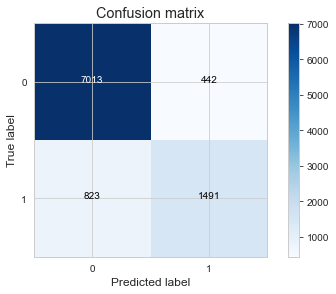

In [130]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
##################################################################################

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, newy_pred)  
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [131]:
#recall
recall = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0])
#precision
precision = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[0,1])
print("recall : ", recall)
print("precision : ", precision)


recall :  0.6443388072601556
precision :  0.7713398861872737


In [132]:
#f1 score
f1_score = 2*(precision * recall) / (precision + recall)
print("f1 score = " , f1_score)

f1 score =  0.7021426889569107


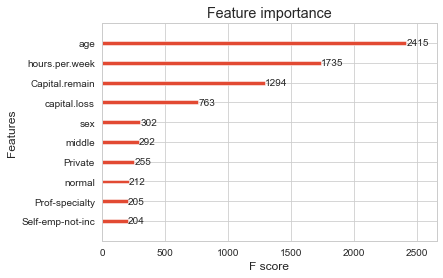

In [133]:
xgb.plot_importance(model,max_num_features=10)

In [134]:
#=======================rf============================

In [135]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(oob_score=True, n_estimators=100, random_state=90)

# Train
rfc.fit(X_train, y_train)

# Predict
y_pred=rfc.predict(X_test)

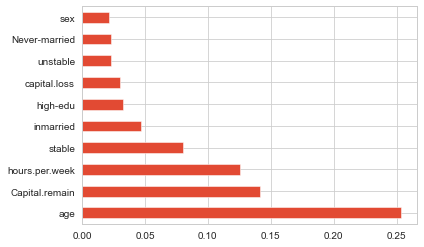

In [136]:
# feature importance score
pd.Series(rfc.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')

In [137]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8448152318558706


Maximum score：0.8457365134609479;
The best choice for "n_estimators" is around：41.


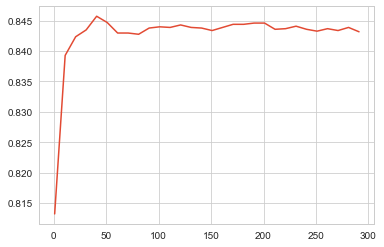

In [138]:
# Parameter Tuning: n_estimators
score_lt = []

# Build a random forest every 10 steps to get the scores with different n_estimators
for i in range(1, 300, 10):
    rfc = RandomForestClassifier(n_estimators=i, random_state=90)
    rfc.fit(X_train, y_train)
    y_pred=rfc.predict(X_test)
    # print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

    score = metrics.accuracy_score(y_test, y_pred)
    score_lt.append(score)
    
score_max = max(score_lt)
print('Maximum score：{};'.format(score_max))
print('The best choice for "n_estimators" is around：{}.'.format(score_lt.index(score_max)*10+1))

# Plot
x = np.arange(1, 300, 10)
plt.plot(x, score_lt)
plt.show()

In [139]:
rfc = RandomForestClassifier(n_estimators=41, random_state=90)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8457365134609479


Maximum score：0.8463507011976661;
The best choice for "n_estimators" is：40.


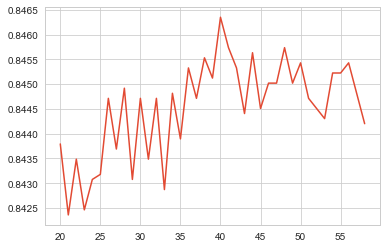

In [140]:
# Find the best choice fot "n_estimators"
score_lt = []

for i in range(20, 59):
    rfc = RandomForestClassifier(n_estimators=i, random_state=90)
    rfc.fit(X_train, y_train)
    y_pred=rfc.predict(X_test)
    #print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

    score = metrics.accuracy_score(y_test, y_pred)
    score_lt.append(score)
    
score_max = max(score_lt)
print('Maximum score：{};'.format(score_max))
print('The best choice for "n_estimators" is：{}.'.format(score_lt.index(score_max)+20))

# Plot
x = np.arange(20, 59)
plt.plot(x, score_lt)
plt.show()

In [141]:
# n_estimators = 40
rfc = RandomForestClassifier(n_estimators=40, random_state=90)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8463507011976661


In [142]:
# Parameter Tuning: max_features
print('Default value of "max_features" is: ', rfc.max_features)

max_f=["sqrt", "log2", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
score_lt = []

for i in range(len(max_f)):
    rfc = RandomForestClassifier(max_features=max_f[i], n_estimators=40, random_state=90)
    rfc.fit(X_train, y_train)
    y_pred=rfc.predict(X_test)
    # print(rfc.max_features)
    # print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 
    
    score = metrics.accuracy_score(y_test, y_pred)
    score_lt.append(score)
    
score_max = max(score_lt)
print('Maximum score：{};'.format(score_max))
print('The best choice for "max_features"：{}.'.format(max_f[score_lt.index(score_max)]))

Default value of "max_features" is:  auto
Maximum score：0.8463507011976661;
The best choice for "max_features"：sqrt.


In [146]:
# max_features = 0.6, n_estimators=40
rfc = RandomForestClassifier(max_features=0.6, n_estimators=40, random_state=90)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8461459719520934


Default value of "max_depth" is:  None
Maximum score：0.8645716040536391;
The best choice for "max_depth" is around：15.


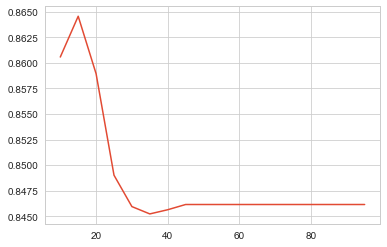

In [147]:
# Parameter Tuning: max_depth
print('Default value of "max_depth" is: ', rfc.max_depth)

score_lt = []

# Build a random forest every 5 steps to get the scores with different max_depth
for i in range(10, 100, 5):
    rfc = RandomForestClassifier(max_depth=i, max_features=0.6, n_estimators=40, random_state=90)
    rfc.fit(X_train, y_train)
    y_pred=rfc.predict(X_test)
    # print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

    score = metrics.accuracy_score(y_test, y_pred)
    score_lt.append(score)
    
score_max = max(score_lt)
print('Maximum score：{};'.format(score_max))
print('The best choice for "max_depth" is around：{}.'.format(score_lt.index(score_max)*5+10))

# Plot
x = np.arange(10, 100, 5)
plt.plot(x, score_lt)
plt.show()

Maximum score：0.8649810625447846;
The best choice for "max_depth" is：14.


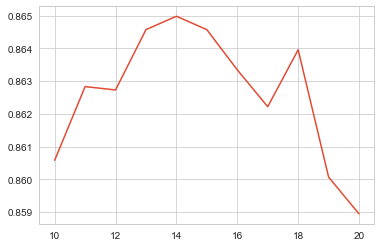

In [148]:
# Find the best choice fot "max_depth"
score_lt = []

for i in range(10, 21):
    rfc = RandomForestClassifier(max_depth=i, max_features=0.6, n_estimators=40, random_state=90)
    rfc.fit(X_train, y_train)
    y_pred=rfc.predict(X_test)
    # print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

    score = metrics.accuracy_score(y_test, y_pred)
    score_lt.append(score)
    
score_max = max(score_lt)
print('Maximum score：{};'.format(score_max))
print('The best choice for "max_depth" is：{}.'.format(score_lt.index(score_max)+10))

# Plot
x = np.arange(10, 21)
plt.plot(x, score_lt)
plt.show()

In [143]:
# max_features = 0.6, n_estimators=40, max_depth=14
rfc = RandomForestClassifier(max_depth=14, max_features=0.6, n_estimators=40, random_state=90)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8646739686764254


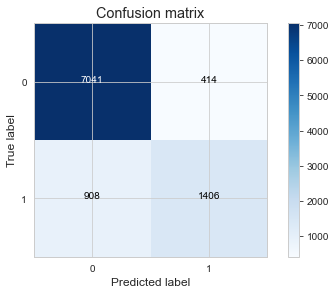

In [144]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [145]:
# Evaluation
TP = confusion_matrix[1,1]   
TN = confusion_matrix[0,0]   
FP = confusion_matrix[0,1]   
FN = confusion_matrix[1,0]  

# Accuracy
accuracy = (TP+TN) / (TP+TN+FP+FN)
print("Accuracy: ", accuracy)

# Recall
recall = TP / (TP+FN)
print("Recall: ", recall)

# Precision
precision = TP / (TP+FP)
print("Precision: ", precision)

# F1 score 
f1 = 2*precision*recall / (precision+recall)
print("F1 score : ", f1)

Accuracy:  0.8646739686764254
Recall:  0.6076058772687987
Precision:  0.7725274725274726
F1 score :  0.6802128688921142


In [146]:
#===============adaboost==================

In [151]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.svm import SVC
#building AdaBoost model
#svc = SVC(probability = True, kernel = 'linear')
adaBoostClassifier = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.8)
model = adaBoostClassifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [152]:
#base_estimator: It is a weak learner used to train the model. 
#It uses DecisionTreeClassifier as default weak learner for training purpose. 
#You can also specify different machine learning algorithms.

#n_estimators: Number of weak learners to train iteratively.

#learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

In [153]:
#evaluating model
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score is : ", accuracy_score)

Accuracy score is :  0.8621148531067663


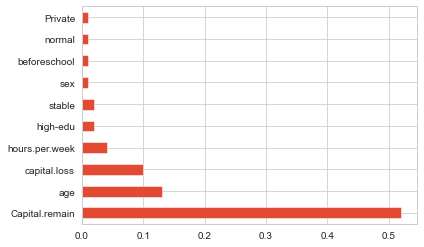

In [154]:
(pd.Series(adaBoostClassifier.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh'))

In [155]:
accuracy_list = []
n_estimator_list = []
for i in range(5,200,5):
    adaBoostClassifier = AdaBoostClassifier(n_estimators = i, learning_rate = 0.8)
    model = adaBoostClassifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy_score)
    n_estimator_list.append(i)
max_accuracy_score = max(accuracy_list)
#print(accuracy_list)
#print(n_estimator_list)
print('The best number of n_estimator is: ', (accuracy_list.index(max_accuracy_score)+1)*5)
print('The max score is: ', max_accuracy_score)

The best number of n_estimator is:  140
The max score is:  0.8643668748080663


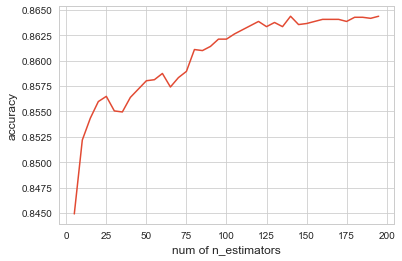

In [156]:
plt.plot(n_estimator_list, accuracy_list)
plt.xlabel("num of n_estimators")
plt.ylabel("accuracy")
plt.show()

In [157]:
new_accuracy_list = []
learning_rate_list = []
for i in np.arange(0.05,1,0.05):
    adaBoostClassifier = AdaBoostClassifier(n_estimators = 150, learning_rate = i)
    model = adaBoostClassifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    new_accuracy_list.append(accuracy_score)
    learning_rate_list.append(i)
max_accuracy_score = max(new_accuracy_list)
#print(new_accuracy_list)
#print(learning_rate_list)
print('The max score is: ', max_accuracy_score)
print('The best learning_rate is: ', (new_accuracy_list.index(max_accuracy_score)+1)*0.05)

The max score is:  0.8649810625447846
The best learning_rate is:  0.8500000000000001


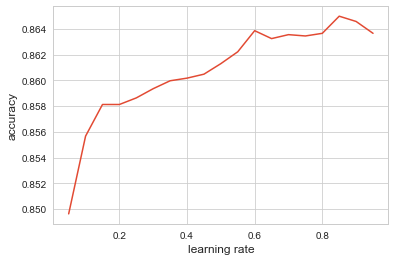

In [158]:
plt.plot(learning_rate_list, new_accuracy_list)
plt.xlabel("learning rate")
plt.ylabel("accuracy")
plt.show()

In [159]:
adaBoostClassifier = AdaBoostClassifier(n_estimators = 140, learning_rate = 0.85)
model = adaBoostClassifier.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("accuracy score is : ", accuracy_score)

accuracy score is :  0.8647763332992118


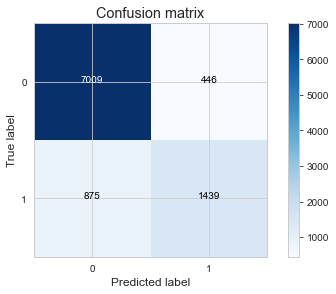

In [161]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [162]:
#recall
recall = confusion_matrix[1,1] / (confusion_matrix[1,1] + confusion_matrix[1,0])
#precision
precision = confusion_matrix[1,1] / (confusion_matrix[1,1] + confusion_matrix[0,1])
print("recall : ", recall)
print("precision : ", precision)

recall :  0.621866897147796
precision :  0.763395225464191


In [163]:
#f1 score
f1_score = 2*(precision * recall) / (precision + recall)
print("f1 score = " , f1_score)

f1 score =  0.6854012860204811


In [164]:
#AUC-ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7810206383793976